In [1]:
import os
from math import log, ceil
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest,chi2
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.naive_bayes import ComplementNB,MultinomialNB
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier,OutputCodeClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

In [2]:
def plotDifferentNumFeatureInfluence(numlists,MNBCscores,CNBCscores,OVRSVC, OVOSVC):
    fig, ax = plt.subplots()
    ax.plot(numlists, MNBCscores,color='tab:red',label='MNBC')
    ax.plot(numlists, CNBCscores,color='tab:blue',label='CNBC')
    ax.plot(numlists, OVRSVC,color='tab:orange',label='OvRSVC')
    ax.plot(numlists ,OVOSVC,color='tab:red',label='OVOSVC')
    ax.set(xlabel='Number of classes', ylabel='Accuracy')
    ax.legend()
    title= 'Accuracy compare with different number of classes in different approach'
    ax.set_title(title)
    ax.grid()
    fig.savefig("Classnum.png")

In [3]:
def plotDifferentNumFeatureInfluenceMacro(numlists,MNBCscores,CNBCscores,OVRSVC, OVOSVC):
    fig, ax = plt.subplots()
    ax.plot(numlists, MNBCscores,color='tab:red',label='MNBC')
    ax.plot(numlists, CNBCscores,color='tab:blue',label='CNBC')
    ax.plot(numlists, OVRSVC,color='tab:orange',label='OvRSVC')
    ax.plot(numlists ,OVOSVC,color='tab:red',label='OVOSVC')
    ax.set(xlabel='Number of classes', ylabel='Accuracy')
    ax.legend()
    title= 'Accuracy compare with different number of classes in different approach'
    ax.set_title(title)
    ax.grid()
    fig.savefig("ClassnumMacro.png")

In [4]:
# Choose folder
folder = ['Amazon','FlipKart','Combine','Walmart']
class OpenData:
    def __init__(self,num):
        self.num = num
    def openFile(self):
        num = self.num
        trainData = pd.read_csv(folder[num]+'/X_train.csv')
        trainLabel = pd.read_csv(folder[num]+'/y_train.csv')
        testData = pd.read_csv(folder[num]+'/X_test.csv')
        testLabel = pd.read_csv(folder[num]+'/y_test.csv')
        if(num==0 or num==2):
            # For Description has nan row
            df = pd.concat([trainData,trainLabel], axis = 1)
            df = df.dropna(subset=['X_train'])
            trainData = pd.DataFrame({'X_train':df.X_train})
            trainLabel = pd.DataFrame({'category':df.category,'subcategory':df.subcategory})
            df = pd.concat([testData,testLabel], axis = 1)
            df = df.dropna(subset=['X_test'])
            testData = pd.DataFrame({'X_test':df.X_test})
            testLabel = pd.DataFrame({'category':df.category,'subcategory':df.subcategory})
        return trainData,trainLabel,testData,testLabel
            

In [5]:
df_label = pd.read_csv('Walmart/label.csv')
od = OpenData((3))
trainData,trainLabel,testData,testLabel = od.openFile()

In [6]:
df_train = pd.DataFrame({'X_train':trainData['X_train'],'y_train':trainLabel['category']})
df_test = pd.DataFrame({'X_test':testData['X_test'],'y_test':testLabel['category']})

In [7]:
df_train.y_train.value_counts(),df_test.y_test.value_counts()

(5     24152
 12    18128
 2      9376
 3      8362
 15     6098
 4      4362
 25     4002
 22     3460
 19     2665
 8      2235
 9      1575
 21     1118
 1       992
 11      968
 23      853
 24      820
 16      764
 18      700
 13      539
 0       518
 26      461
 17      456
 31      277
 29      275
 10      173
 7       162
 6       156
 20      127
 30       58
 27       46
 14       30
 28       30
 Name: y_train, dtype: int64, 5     5988
 12    4572
 2     2404
 3     2047
 15    1567
 4     1031
 25     999
 22     814
 19     669
 8      573
 9      362
 21     282
 1      277
 11     239
 24     222
 23     207
 18     193
 16     190
 26     152
 13     129
 17     123
 0      114
 29      70
 31      69
 7       50
 10      38
 6       36
 20      30
 27      13
 30      11
 14      10
 28       4
 Name: y_test, dtype: int64)

In [8]:
# Origin 
OuputNum = len(df_train.y_train.unique())
target = df_label['targetName'].values
print(len(target))
print("----- Origin Class Num " + str(OuputNum) + '\n')
df_train_nd = df_train[(df_train.y_train!=5) & (df_train.y_train!=28)& (df_train.y_train!=12) & (df_train.y_train!=14)]
df_test_nd = df_test[(df_test.y_test!=5) & (df_test.y_test!=28) & (df_test.y_test!=12) & (df_test.y_test!=14)]
OuputNumnd = len(df_train_nd.y_train.unique())
target1 = df_label[(df_label.newLabel!=5) & (df_label.newLabel!=28)& (df_label.newLabel!=12) & (df_label.newLabel!=14)]['targetName'].values
df_label = df_label[(df_label.newLabel!=5) & (df_label.newLabel!=28)& (df_label.newLabel!=12) & (df_label.newLabel!=14)]
print(len(target1))
print("----- Second Class Num " + str(OuputNumnd) + '\n')
df_train_rd = df_train_nd[(df_train_nd.y_train!=30) & (df_train_nd.y_train!=27)& (df_train_nd.y_train!=2) & (df_train_nd.y_train!=3)]
df_test_rd = df_test_nd[(df_test_nd.y_test!=30) & (df_test_nd.y_test!=27) & (df_test_nd.y_test!=2) & (df_test_nd.y_test!=3)]
OuputNumrd = len(df_train_rd.y_train.unique())
target2 = df_label[(df_label.newLabel!=30) & (df_label.newLabel!=27)& (df_label.newLabel!=2) & (df_label.newLabel!=3)]['targetName'].values
df_label = df_label[(df_label.newLabel!=30) & (df_label.newLabel!=27)& (df_label.newLabel!=2) & (df_label.newLabel!=3)]
print(len(target2))

print("----- Third Class Num " + str(OuputNumrd) + '\n')
df_train_or = df_train_rd[(df_train_rd.y_train!=20) & (df_train_rd.y_train!=6)& (df_train_rd.y_train!=15) & (df_train_rd.y_train!=4)]
df_test_or = df_test_rd[(df_test_rd.y_test!=20) & (df_test_rd.y_test!=6) & (df_test_rd.y_test!=15) & (df_test_rd.y_test!=4)]
OuputNumor = len(df_train_or.y_train.unique())
target3 = df_label[(df_label.newLabel!=20) & (df_label.newLabel!=6)& (df_label.newLabel!=15) & (df_label.newLabel!=4)]['targetName'].values
df_label = df_label[(df_label.newLabel!=20) & (df_label.newLabel!=6)& (df_label.newLabel!=15) & (df_label.newLabel!=4)]
print(len(target3))

print("----- Fourth Class Num " + str(OuputNumor) + '\n')
df_train_fif = df_train_or[(df_train_or.y_train!=10) & (df_train_or.y_train!=7)& (df_train_or.y_train!=25) & (df_train_or.y_train!=22)]
df_test_fif = df_test_or[(df_test_or.y_test!=10) & (df_test_or.y_test!=7) & (df_test_or.y_test!=25) & (df_test_or.y_test!=22)]
OuputNumfif = len(df_train_fif.y_train.unique())
target4 = df_label[(df_label.newLabel!=10) & (df_label.newLabel!=7)& (df_label.newLabel!=25) & (df_label.newLabel!=22)]['targetName'].values
df_label = df_label[(df_label.newLabel!=10) & (df_label.newLabel!=7)& (df_label.newLabel!=25) & (df_label.newLabel!=22)]
print(len(target4))

print("----- Fifth Class Num " + str(OuputNumfif) + '\n')
df_train_six = df_train_fif[(df_train_fif.y_train!=31) & (df_train_fif.y_train!=29)& (df_train_fif.y_train!=19) & (df_train_fif.y_train!=8)]
df_test_six = df_test_fif[(df_test_fif.y_test!=31) & (df_test_fif.y_test!=29) & (df_test_fif.y_test!=19) & (df_test_fif.y_test!=8)]
OuputNumsix = len(df_train_six.y_train.unique())
target5 = df_label[(df_label.newLabel!=31) & (df_label.newLabel!=29)& (df_label.newLabel!=19) & (df_label.newLabel!=8)]['targetName'].values
df_label =  df_label[(df_label.newLabel!=31) & (df_label.newLabel!=29)& (df_label.newLabel!=19) & (df_label.newLabel!=8)]
print(len(target5))

print("----- Sixth Class Num " + str(OuputNumsix) + '\n')
dfTrain = [df_train,df_train_nd,df_train_rd,df_train_or,df_train_fif,df_train_six]
dfTest = [df_test,df_test_nd,df_test_rd,df_test_or,df_test_fif,df_test_six]
OuputClassNum = [OuputNum,OuputNumnd,OuputNumrd,OuputNumor,OuputNumfif,OuputNumsix]
targets = [target,target1,target2,target3,target4,target5]




32
----- Origin Class Num 32

28
----- Second Class Num 28

24
----- Third Class Num 24

20
----- Fourth Class Num 20

16
----- Fifth Class Num 16

12
----- Sixth Class Num 12



In [9]:
class MachineLearningModel:
    def __init__(self, Train,Test):
        tfidfconverter = TfidfVectorizer(min_df=5, max_df=0.7)  
        tfidfconverter.fit(Train['X_train'])
        XTrain = tfidfconverter.transform(Train['X_train'])
        XTest = tfidfconverter.transform(Test['X_test'])
        print(XTrain.shape)
        print(XTest.shape)
        num = 8000
        selectBest = SelectKBest(chi2, k=num).fit(XTrain, Train['y_train'])
        select_feature = selectBest.transform(XTrain)
        test_features = selectBest.transform(XTest)
        self.X_train = select_feature
        self.X_test = test_features
        self.y_train = Train['y_train']
        self.y_test = Test['y_test']
    def MNBC(self,n):
        X_train = self.X_train
        y_train = self.y_train
        X_test = self.X_test
        y_test= self.y_test
        self.target = np.sort(y_train.unique())
        MNBC = MultinomialNB()
        MNBC.fit(X_train,y_train)
        %time
        score = MNBC.score(X_test,y_test)
        yPred = MNBC.predict(X_test)
        report = classification_report(y_test, yPred,target_names=targets[n])
        macro_score= f1_score(y_test, yPred, average='macro')  
        return score,report,macro_score 
    def CNBC(self,n):
        X_train = self.X_train
        y_train = self.y_train
        X_test = self.X_test
        y_test= self.y_test
        self.target = np.sort(y_train.unique())
        CNBC = ComplementNB()
        CNBC.fit(X_train,y_train)
        %time
        score = CNBC.score(X_test,y_test)
        yPred = CNBC.predict(X_test)
        report = classification_report(y_test, yPred,target_names=targets[n])
        macro_score= f1_score(y_test, yPred, average='macro')  
        return score,report,macro_score 
    def OvRSVM(self,n):
        X_train = self.X_train
        y_train = self.y_train
        X_test = self.X_test
        y_test= self.y_test
        self.target = np.sort(y_train.unique())
        linearSVM = LinearSVC(random_state=42,tol=1e-5,class_weight="balanced")
        linearSVM.fit(X_train,y_train)
        %time
        score = linearSVM.score(X_test,y_test)
        yPred = linearSVM.predict(X_test)
        report = classification_report(y_test, yPred,target_names=targets[n])
        macro_score= f1_score(y_test, yPred, average='macro')  
        return score,report,macro_score 
    def OvOSVM(self,n):
        X_train = self.X_train
        y_train = self.y_train
        X_test = self.X_test
        y_test= self.y_test
        self.target = np.sort(y_train.unique())
        OvOSVC = SVC(gamma='scale', decision_function_shape='ovo')
        OvOSVC.fit(X_train,y_train)
        %time
        score = OvOSVC.score(X_test,y_test)
        yPred = OvOSVC.predict(X_test)
        report = classification_report(y_test, yPred,target_names=targets[n])
        macro_score= f1_score(y_test, yPred, average='macro')  
        return score,report,macro_score 

In [10]:
CNBCscores = []
CNBCreports = []
CNBCmacro = []
count = 0
for ele in zip(dfTrain,dfTest):
    model = MachineLearningModel(ele[0],ele[1])
    score,report,macro = model.CNBC(count)
    CNBCscores.append(score)
    CNBCreports.append(report)
    CNBCmacro.append(macro)
    count = count +1

(93938, 24650)
(23485, 24650)
CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 12.4 µs


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(51598, 18897)
(12911, 18897)
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(33756, 15646)
(8436, 15646)
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.11 µs


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(23013, 12335)
(5772, 12335)
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.82 µs
(15216, 10446)
(3871, 10446)
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs
(9764, 8379)
(2490, 8379)
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs


In [11]:
MNBCscores = []
MNBCreports = []
MNBCmacro = []
count = 0
for ele in zip(dfTrain,dfTest):
    model = MachineLearningModel(ele[0],ele[1])
    score,report,macro = model.MNBC(count)
    MNBCscores.append(score)
    MNBCreports.append(report)
    MNBCmacro.append(macro)
    count = count+1

(93938, 24650)
(23485, 24650)
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.54 µs


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(51598, 18897)
(12911, 18897)
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(33756, 15646)
(8436, 15646)
CPU times: user 59 µs, sys: 7 µs, total: 66 µs
Wall time: 12.9 µs


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(23013, 12335)
(5772, 12335)
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.3 µs
(15216, 10446)
(3871, 10446)
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.82 µs
(9764, 8379)
(2490, 8379)
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


In [12]:
OvRSVCscores = []
OvRSVCreports = []
OvRSVCmacro = []
count = 0

for ele in zip(dfTrain,dfTest):
    model = MachineLearningModel(ele[0],ele[1])
    score,report,macro = model.OvRSVM(count)
    OvRSVCscores.append(score)
    OvRSVCreports.append(report)
    OvRSVCmacro.append(macro)
    count = count+1

(93938, 24650)
(23485, 24650)


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.5 µs
(51598, 18897)
(12911, 18897)


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs
(33756, 15646)
(8436, 15646)
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
(23013, 12335)
(5772, 12335)
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.11 µs
(15216, 10446)
(3871, 10446)
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs
(9764, 8379)
(2490, 8379)
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.11 µs


In [13]:
OVOSVCscores = []
OVOSVCreports = []
OvOSVCmacro = []

count = 0

for ele in zip(dfTrain,dfTest):
    model = MachineLearningModel(ele[0],ele[1])
    score,report,macro = model.OvOSVM(count)
    OVOSVCscores.append(score)
    OVOSVCreports.append(report)
    OvOSVCmacro.append(macro)
    count = count +1

(93938, 24650)
(23485, 24650)
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.3 µs


/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/justin/mscproject/app/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(51598, 18897)
(12911, 18897)
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs
(33756, 15646)
(8436, 15646)
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.82 µs
(23013, 12335)
(5772, 12335)
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
(15216, 10446)
(3871, 10446)
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
(9764, 8379)
(2490, 8379)
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


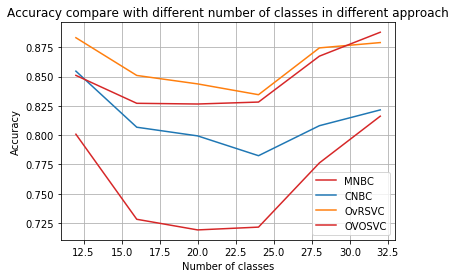

In [14]:
plotDifferentNumFeatureInfluence(OuputClassNum,MNBCscores,CNBCscores,OvRSVCscores, OVOSVCscores)

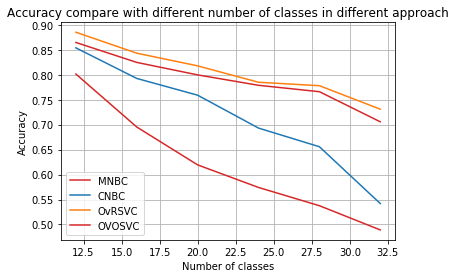

In [16]:
plotDifferentNumFeatureInfluenceMacro(OuputClassNum,MNBCmacro,CNBCmacro ,OvRSVCmacro, OvOSVCmacro)

In [32]:
for ele in MNBCreports:
    num = OuputClassNum[MNBCreports.index(ele)]
    fileName = str(num)+'class_MNBC_Report.txt'
    with open(fileName, 'w') as file:
        file.write(ele)

In [33]:
for ele in CNBCreports:
    num = OuputClassNum[CNBCreports.index(ele)]
    fileName = str(num)+'class_CNBC_Report.txt'
    with open(fileName, 'w') as file:
        file.write(ele)

In [34]:
for ele in OvRSVCreports:
    num = OuputClassNum[OvRSVCreports.index(ele)]
    fileName = str(num)+'class_OvRSVC_Report.txt'
    with open(fileName, 'w') as file:
        file.write(ele)

In [35]:
for ele in OVOSVCreports:
    num = OuputClassNum[OVOSVCreports.index(ele)]
    fileName = str(num)+'class_OvOSVC_Report.txt'
    with open(fileName, 'w') as file:
        file.write(ele)